# Create and Train Neural Network Model

In [1]:
#Import All Required Packages
import os
import cv2
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Setting up paths
trainDir= "Dataset/train"
validDir= "Dataset/valid"
testDir= "Dataset/test"

In [3]:
#Generating Batches for training and validating
#Batches are created after preprocessing the images in folder with processing function for mobile net
trainBatch= ImageDataGenerator(rotation_range= 40, zoom_range=[0.15,1.4], preprocessing_function= tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory= trainDir, shuffle=True, target_size=(224,224), batch_size = 32)
validBatch= ImageDataGenerator(rotation_range= 40, zoom_range=[0.15,1.4], preprocessing_function= tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory= validDir, shuffle=True, target_size=(224,224), batch_size = 32)

Found 12757 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [4]:
#Download and save MobileNet Model
mobile= tf.keras.applications.MobileNet()

In [5]:
#Original Model layers and Summary
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [6]:
#Creating custom output for mobile net model
x = mobile.layers[-6].output
output = tf.keras.layers.Dense(units=10, activation='softmax')(x)
model = tf.keras.models.Model(inputs=mobile.input, outputs=output)

In [7]:
#New model layers and summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [8]:
#Compile the model
model.compile(optimizer= tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics= ['accuracy'])

In [9]:
#Fine Tune the model to predict requred classes
for i in range(0,25):
    print("Epoch Completed: {}".format(i*10))
    model.fit(x= trainBatch, validation_data= validBatch, epochs= 10, verbose= 2)

    #Save the model
    model.save('model\mainModel{}.h5'.format(i))

Epoch Completed: 0
Epoch 1/10
399/399 - 194s - loss: 0.8252 - accuracy: 0.7358 - val_loss: 0.3533 - val_accuracy: 0.8907
Epoch 2/10
399/399 - 197s - loss: 0.2691 - accuracy: 0.9149 - val_loss: 0.1884 - val_accuracy: 0.9397
Epoch 3/10
399/399 - 195s - loss: 0.1889 - accuracy: 0.9387 - val_loss: 0.1254 - val_accuracy: 0.9573
Epoch 4/10
399/399 - 188s - loss: 0.1409 - accuracy: 0.9556 - val_loss: 0.1132 - val_accuracy: 0.9637
Epoch 5/10
399/399 - 190s - loss: 0.1181 - accuracy: 0.9628 - val_loss: 0.1145 - val_accuracy: 0.9620
Epoch 6/10
399/399 - 190s - loss: 0.1014 - accuracy: 0.9669 - val_loss: 0.0820 - val_accuracy: 0.9690
Epoch 7/10
399/399 - 189s - loss: 0.0941 - accuracy: 0.9697 - val_loss: 0.0747 - val_accuracy: 0.9733
Epoch 8/10
399/399 - 189s - loss: 0.0818 - accuracy: 0.9740 - val_loss: 0.0644 - val_accuracy: 0.9777
Epoch 9/10
399/399 - 190s - loss: 0.0762 - accuracy: 0.9727 - val_loss: 0.0665 - val_accuracy: 0.9783
Epoch 10/10
399/399 - 188s - loss: 0.0719 - accuracy: 0.9761 - 

Epoch 8/10
399/399 - 188s - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0171 - val_accuracy: 0.9943
Epoch 9/10
399/399 - 188s - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0123 - val_accuracy: 0.9947
Epoch 10/10
399/399 - 188s - loss: 0.0203 - accuracy: 0.9929 - val_loss: 0.0198 - val_accuracy: 0.9950
Epoch Completed: 80
Epoch 1/10
399/399 - 188s - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0184 - val_accuracy: 0.9953
Epoch 2/10
399/399 - 187s - loss: 0.0177 - accuracy: 0.9934 - val_loss: 0.0198 - val_accuracy: 0.9943
Epoch 3/10
399/399 - 188s - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0143 - val_accuracy: 0.9950
Epoch 4/10
399/399 - 187s - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.0112 - val_accuracy: 0.9953
Epoch 5/10
399/399 - 189s - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.0094 - val_accuracy: 0.9967
Epoch 6/10
399/399 - 190s - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.0150 - val_accuracy: 0.9957
Epoch 7/10
399/399 - 189s - loss: 0.0170 - accuracy: 0.9945 -

Epoch 7/10
399/399 - 189s - loss: 0.0119 - accuracy: 0.9956 - val_loss: 0.0087 - val_accuracy: 0.9967
Epoch 8/10
399/399 - 188s - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0199 - val_accuracy: 0.9947
Epoch 9/10
399/399 - 187s - loss: 0.0134 - accuracy: 0.9962 - val_loss: 0.0165 - val_accuracy: 0.9940
Epoch 10/10
399/399 - 189s - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0107 - val_accuracy: 0.9963
Epoch Completed: 160
Epoch 1/10
399/399 - 189s - loss: 0.0133 - accuracy: 0.9951 - val_loss: 0.0090 - val_accuracy: 0.9967
Epoch 2/10
399/399 - 189s - loss: 0.0094 - accuracy: 0.9963 - val_loss: 0.0197 - val_accuracy: 0.9957
Epoch 3/10
399/399 - 190s - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0104 - val_accuracy: 0.9963
Epoch 4/10
399/399 - 189s - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0078 - val_accuracy: 0.9970
Epoch 5/10
399/399 - 189s - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0192 - val_accuracy: 0.9947
Epoch 6/10
399/399 - 188s - loss: 0.0122 - accuracy: 0.9965 

Epoch 6/10
399/399 - 204s - loss: 0.0079 - accuracy: 0.9966 - val_loss: 0.0072 - val_accuracy: 0.9977
Epoch 7/10
399/399 - 206s - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0054 - val_accuracy: 0.9980
Epoch 8/10
399/399 - 207s - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.0163 - val_accuracy: 0.9950
Epoch 9/10
399/399 - 210s - loss: 0.0093 - accuracy: 0.9964 - val_loss: 0.0076 - val_accuracy: 0.9973
Epoch 10/10
399/399 - 210s - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.0081 - val_accuracy: 0.9963
Epoch Completed: 240
Epoch 1/10
399/399 - 207s - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0055 - val_accuracy: 0.9977
Epoch 2/10
399/399 - 205s - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0081 - val_accuracy: 0.9967
Epoch 3/10
399/399 - 208s - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0046 - val_accuracy: 0.9983
Epoch 4/10
399/399 - 211s - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0083 - val_accuracy: 0.9967
Epoch 5/10
399/399 - 204s - loss: 0.0077 - accuracy: 0.9975 

# Testing Trained Model

In [2]:
#import packages for visualizing performance of trained model with confusion matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [11]:
#load trained Model
model= tf.keras.models.load_model('model\mainModel24.h5')

In [9]:
#initialize prediction array 
cm= np.zeros([10,10])
lables = ["Zero","One","Two","Three","Four","Five","ThumbsUp","Ok","SpiderMan","Rock"]

In [4]:
#preprocessing the image, Same as done to create batches
def preProcess(image):
    image= np.array(image)
    resized= cv2.resize(image, (224,224))
    resized= cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    filtered= tf.keras.applications.mobilenet.preprocess_input(resized)
    reshaped= filtered.reshape(-1,224,224,3)
    return reshaped, filtered

In [14]:
#Access all class folder images and start predicting
count = 0
for subs in os.listdir(testDir):
    print(lables[count])
    for images in os.listdir(os.path.join(testDir, subs)):
        img = cv2.imread(os.path.join(testDir, subs, images), -1)
        prosimg = preProcess(img)
        pred = model.predict(prosimg)
        cm[count][np.argmax(pred[0])] = cm[count][np.argmax(pred[0])] + 1
    count = count + 1

Zero
One
Two
Three
Four
Five
ThumbsUp
Ok
SpiderMan
Rock


In [15]:
#Array Containing Confusion Matrix
cm

array([[20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 20.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20.]])

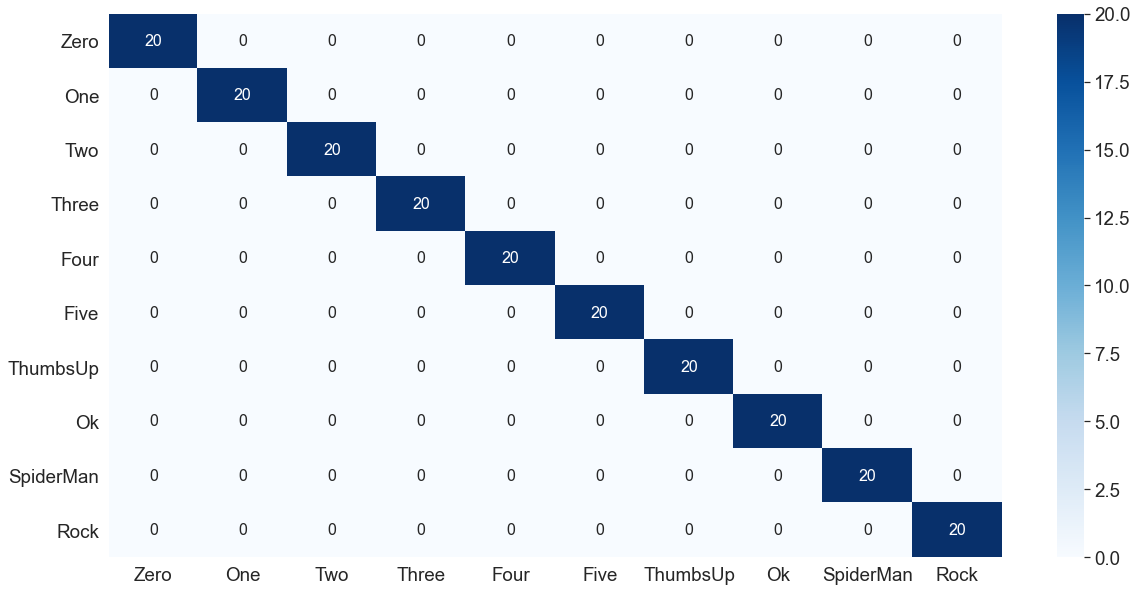

In [16]:
#Setup Confusion Matrix and display
df_cm = pd.DataFrame(cm, lables, lables)
plt.figure(figsize=(20,10))
sn.set(font_scale=1.7) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # font size
plt.show()

# Convert h5 model to tflite

In [17]:
model= tf.keras.models.load_model('model/mainModel24.h5')

In [18]:
converter= tf.lite.TFLiteConverter.from_keras_model(model)
tf_model= converter.convert()
with open('model\mainModel.tflite', 'wb') as f:
    f.write(tf_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\abhir\AppData\Local\Temp\tmpll6f9jj0\assets


# Testing Model with live video

In [5]:
#The value in the bracket can change as per the camera in use
vid= cv2.VideoCapture(1)

In [6]:
interpreter= tf.lite.Interpreter(model_path= 'model/mainModel.tflite')
interpreter.allocate_tensors()
input_details= interpreter.get_input_details()
output_details= interpreter.get_output_details()

In [10]:
while True:
    ret, frame= vid.read()
    if ret==0:
        print("No Camera Detected, try changing port number")
        break

    shape_fr = frame.shape
    start_pt = (int(shape_fr[1]/16),int(shape_fr[0]/4))
    end_pt = (int(shape_fr[1]/2-shape_fr[1]/16),int(shape_fr[0] - shape_fr[0]/4))

    roi = frame[int(shape_fr[0]/4):int(shape_fr[0] - shape_fr[0]/4),int(shape_fr[1]/16):int(shape_fr[1]/2-shape_fr[1]/16)]
    processFrame, prosImg= preProcess(roi)
    frame = cv2.rectangle(frame, start_pt, end_pt, (255,0,0), 2)
    
    interpreter.set_tensor(input_details[0]['index'], processFrame)
    interpreter.invoke()
    pred= interpreter.get_tensor(output_details[0]['index']) 
    
#     pred= model.predict(processFrame)
    
    gest = lables[np.argmax(pred[0])]
    cv2.putText(frame, gest, (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    cv2.imshow('Processed Image', prosImg)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()